In [93]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras import layers, callbacks
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_recall_fscore_support,
    classification_report
)

# **Load la matrice d'expression et les metadata**

In [94]:
X = pd.read_csv("../data/THCA_expression_matrix_final.csv", index_col=0)
X = X.T

In [95]:
X.head()

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
ID=TCGA-DJ-A2Q6_AGE=38ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,6156,7,2540,1452,297,1075,26323,3481,3414,4228,...,0,0,26,0,0,0,714,0,7,31
ID=TCGA-FK-A3SE_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,7191,3,3815,767,276,1069,18403,3861,2562,5715,...,0,0,10,0,0,0,598,0,5,22
ID=TCGA-DJ-A2QA_AGE=56ANS_SEX=female_STAGE=Stade_III_MUT=BRAF_TYPE=PTC,2219,1,735,305,28,303,4710,2995,495,618,...,0,0,3,0,0,0,144,0,0,31
ID=TCGA-FY-A2QD_AGE=61ANS_SEX=female_STAGE=Stage_NA_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,5185,0,2594,970,135,71,2986,2033,2469,2901,...,0,2,9,0,0,0,603,0,2,11
ID=TCGA-EL-A3GR_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,4466,3,1496,820,208,610,25601,2051,1894,2378,...,0,0,5,0,0,0,365,0,3,12


### ajout des metadata à la matrice d'expression

In [96]:
labels = pd.Index(X.index)   # index = patients

age = (
    labels
    .str.extract(r"AGE=(\d+)ANS")[0]
    .astype(float))

sex = (
    labels
    .str.extract(r"SEX=([a-zA-Z]+)")[0]
    .str.lower()
    .map({"male": 1, "female": 0}))

# ATTENTION !! Eviter d'utiliser les metadata suivantes dans X_full. 
# elles sont ajoutées seulement si on en a besoin pour un modèle

stage = (
    labels
    .str.extract(r"STAGE=([^_]+_[^_]+)")[0]) # ne pas ajouter à X_full

stage_map = {
    "Stade_I": 0,
    "Stade_II": 1,
    "Stade_III": 2,
    "Stade_IV": 3
} # ne pas ajouter à X_full
stage_enc = stage.map(stage_map)

mutation = (
    labels
    .str.extract(r"MUT=([^_]+)")[0]) # ne pas ajouter à X_full


X_full = X.copy()
X_full["age"] = age.values
X_full["sex"] = sex.values

X_full

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,age,sex
ID=TCGA-DJ-A2Q6_AGE=38ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,6156,7,2540,1452,297,1075,26323,3481,3414,4228,...,26,0,0,0,714,0,7,31,38.0,0
ID=TCGA-FK-A3SE_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,7191,3,3815,767,276,1069,18403,3861,2562,5715,...,10,0,0,0,598,0,5,22,31.0,0
ID=TCGA-DJ-A2QA_AGE=56ANS_SEX=female_STAGE=Stade_III_MUT=BRAF_TYPE=PTC,2219,1,735,305,28,303,4710,2995,495,618,...,3,0,0,0,144,0,0,31,56.0,0
ID=TCGA-FY-A2QD_AGE=61ANS_SEX=female_STAGE=Stage_NA_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,5185,0,2594,970,135,71,2986,2033,2469,2901,...,9,0,0,0,603,0,2,11,61.0,0
ID=TCGA-EL-A3GR_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,4466,3,1496,820,208,610,25601,2051,1894,2378,...,5,0,0,0,365,0,3,12,31.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID=TCGA-EL-A3TB_AGE=47ANS_SEX=female_STAGE=Stade_III_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,4742,3,2172,1171,245,372,5861,3069,1740,2560,...,29,0,0,0,377,0,3,23,47.0,0
ID=TCGA-BJ-A45C_AGE=78ANS_SEX=male_STAGE=Stade_III_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,3753,4,1491,962,166,184,1663,2433,1244,1713,...,59,0,0,0,489,0,17,3,78.0,1
ID=TCGA-DJ-A3UX_AGE=46ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,4488,5,2061,1151,250,775,9620,2795,2425,2753,...,24,0,0,0,539,0,6,11,46.0,0
ID=TCGA-DJ-A2PX_AGE=54ANS_SEX=female_STAGE=Stade_I_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,6131,6,2439,1213,242,1076,8511,3439,3132,2428,...,8,0,0,0,458,0,4,35,54.0,0


# **Définition de la cible qu'on cherche à prédire**

voir si on peut pas accumuler plusieurs prédictions par la suite

Choisissez la variable que vous voulez prédire en remplacant "choix" par le nom de la liste que vous voulez :

In [152]:
liste_des_prédictions = ["stade_tumoral", "type_tumoral", "mutation"]
choix = "stade_tumoral"

### _**préparation des inputs + labels du modèle**_

Pour prédire le stade tumoral on va prédire 1 état parmi 2 possibilités : 
- **0** : stade précoce (stade I et II)
- **1** : stade avancé (stade III et IV) 
c'est utile de regrouper les stades en 2 catégories car il y a peu de patients dans les stades III et IV, ca permet d'avoir un dataset plus équilibré pour l'entrainement du modèle.


ici, j'ai crée une fonction qui réuni les 3 prédictions qu'on voudrait faire. 
Pour chaque prédiction, la variable cible est identifiée (comme label)

| Nombre de classes | Format des labels | Activation finale | Loss |
|------------|------------|------------|------------|
| 2 classes (binaire)    | 0/1    | sigmoid    |binary_crossentropy    |
| ≥3 classes (entiers)   | 0,1,2...    | softmax    |sparse_categorical_crossentropy    |
| ≥3 classes (one-hot)     | [1,0,01, [0,1,0], ...]   | softmax    |categorical_crossentropy    |
| Valeurs continues    | floats  | aucune (ou linear)    |mse / mae    |

In [153]:
from sklearn.preprocessing import LabelEncoder

def build_task(choix, X):
    labels_index = pd.Index(X.index)
    X_out = X.copy()

    if choix == "stade_tumoral":
        # extraire le stade depuis le nom
        stade = pd.Series(stage.values, index=X_out.index)

        # garder uniquement les patients avec un stade défini
        mask = stade != "Stage_NA"
        X_out = X_out.loc[mask]

        # early vs late
        labels = stade.loc[mask].isin(
            ["Stade_III", "Stade_IV"]
        ).astype(int).values

        class_names = ["Early", "Late"]
        n_classes = 1 # nombre de neurones de sortie
        loss = "binary_crossentropy"
        output_activation = "sigmoid"
        encoder = None
    
    elif choix == "type_tumoral":
        tumor_type = pd.Series(labels_index.str.extract(r"TYPE=([^_]+)")[0].values, index=X_out.index)

        encoder = LabelEncoder()
        labels = encoder.fit_transform(tumor_type)
        
        class_names = encoder.classes_.tolist()
        n_classes = len(class_names)
        loss = "sparse_categorical_crossentropy"
        output_activation = "softmax"

    elif choix == "mutation":
        mutation = pd.Series(labels_index.str.extract(r"MUT=([^_]+)")[0].values, index=X_out.index)

        encoder = LabelEncoder()
        labels = encoder.fit_transform(mutation)
        
    
        class_names = encoder.classes_.tolist()
        n_classes = len(class_names)
        loss = "sparse_categorical_crossentropy"
        output_activation = "softmax"

    else:
        raise ValueError(
            "le choix doit etre 'stade_tumoral', 'type_tumoral' ou 'mutation'"
        )

    return X_out.values, labels, encoder, loss, class_names, n_classes, output_activation

X_out, labels, encoder, loss, class_names, n_classes, output_activation = build_task(choix, X_full)

In [154]:
print(f"les labels de {choix} : \n{labels}")

les labels de stade_tumoral : 
[0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1
 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1
 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0
 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1
 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0
 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0]


In [155]:
print(f"l'input de la matrice d'expression pour {choix} : \n{X_out}")

l'input de la matrice d'expression pour stade_tumoral : 
[[6.156e+03 7.000e+00 2.540e+03 ... 3.100e+01 3.800e+01 0.000e+00]
 [7.191e+03 3.000e+00 3.815e+03 ... 2.200e+01 3.100e+01 0.000e+00]
 [2.219e+03 1.000e+00 7.350e+02 ... 3.100e+01 5.600e+01 0.000e+00]
 ...
 [4.488e+03 5.000e+00 2.061e+03 ... 1.100e+01 4.600e+01 0.000e+00]
 [6.131e+03 6.000e+00 2.439e+03 ... 3.500e+01 5.400e+01 0.000e+00]
 [4.097e+03 4.000e+00 2.218e+03 ... 3.100e+01 2.200e+01 0.000e+00]]


In [156]:
print(f"les classes qu'on veut prédire de {choix} sont : \n{class_names}")

les classes qu'on veut prédire de stade_tumoral sont : 
['Early', 'Late']


In [157]:
values, counts = np.unique(labels, return_counts=True)

for v, c in zip(values, counts):
    print(f"Classe {v} : {c}")

Classe 0 : 312
Classe 1 : 148


# **Preprocessing**

il faut réduire le nombre de features (gènes) pour éviter l'overfitting et améliorer les performances du modèle. On peut utiliser des techniques comme la sélection de caractéristiques basées sur l'importance des gènes, ou des méthodes de réduction de dimensionnalité comme juste prendre les gènes les + exprimés, si on a le temps faudrait utiliser un autoendeur !!!!!.

In [158]:
# récupérer les noms
gene_names = X_full.columns[:-2]
meta_names = X_full.columns[-2:]

X_expr = X_out[:, :-2]   # gènes uniquement
X_meta = X_out[:, -2:]   # age, sex

# filtrage variance
variances = X_expr.var(axis=0)
k = 1000
top_idx = np.argsort(variances)[-k:]
selected_genes = gene_names[top_idx]

# reconstruire DataFrame
X_expr_filt = X_expr[:, top_idx]

X_reduced = pd.DataFrame(
    np.hstack([X_expr_filt, X_meta]),
    # index=X_full.index[:X_expr_filt.shape[0]], # indice décalé pour stage tumoral parce que on a retiré 45 patients, on l'enleve, c'est plus important
    columns=list(selected_genes) + list(meta_names)
)


X_reduced

,ENSG00000143324.14,ENSG00000115310.18,ENSG00000051523.11,ENSG00000144028.15,ENSG00000077942.19,ENSG00000196305.18,ENSG00000178947.9,ENSG00000156482.11,ENSG00000148248.14,ENSG00000128567.17,...,ENSG00000211896.7,ENSG00000211592.8,ENSG00000198938.2,ENSG00000198886.2,ENSG00000210082.2,ENSG00000198804.2,ENSG00000115414.21,ENSG00000042832.12,age,sex
0,17842.0,21243.0,5496.0,24429.0,12675.0,9751.0,7927.0,15063.0,20316.0,20989.0,...,70179.0,88333.0,364170.0,524661.0,494913.0,891163.0,1722652.0,2131062.0,38.0,0.0
1,15776.0,23053.0,6559.0,22842.0,3043.0,10684.0,3644.0,16792.0,26121.0,10364.0,...,14425.0,10476.0,131377.0,150668.0,134770.0,291615.0,622736.0,2150009.0,31.0,0.0
2,1683.0,7809.0,13150.0,6253.0,4302.0,1073.0,3018.0,15028.0,9926.0,4015.0,...,5079.0,6872.0,168881.0,166924.0,195922.0,189345.0,90318.0,2485163.0,56.0,0.0
3,13525.0,12984.0,6220.0,14855.0,5317.0,6077.0,1484.0,11773.0,13532.0,9502.0,...,6682.0,5576.0,109789.0,175456.0,106100.0,267877.0,991447.0,874404.0,31.0,0.0
4,26505.0,23248.0,7768.0,25362.0,724.0,9762.0,9539.0,16194.0,27056.0,6458.0,...,4312.0,4907.0,400951.0,433335.0,212569.0,585322.0,2605928.0,857182.0,47.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,9182.0,12725.0,7288.0,15506.0,829.0,5999.0,3385.0,15844.0,16801.0,5404.0,...,51259.0,39394.0,228389.0,283778.0,182703.0,397220.0,181019.0,2084062.0,47.0,0.0
456,2546.0,6656.0,7064.0,15009.0,1114.0,3914.0,1499.0,21562.0,10762.0,8005.0,...,84.0,88.0,226680.0,386679.0,245896.0,616970.0,5605.0,3683187.0,78.0,1.0
457,5506.0,16208.0,6276.0,19186.0,10650.0,11154.0,3238.0,17034.0,15425.0,8443.0,...,214328.0,129739.0,491447.0,510406.0,314334.0,772270.0,324850.0,2993363.0,46.0,0.0
458,8182.0,13394.0,12388.0,15168.0,2222.0,6681.0,11902.0,12464.0,16519.0,12107.0,...,924718.0,897905.0,317812.0,477236.0,281066.0,776891.0,154139.0,2877400.0,54.0,0.0


# **Split les données train et test**

protection contre les classes avec trop peu d'échantillons : 

In [159]:
min_samples = 5  

counts = pd.Series(labels).value_counts()
valid_classes = counts[counts >= min_samples].index

mask = pd.Series(labels).isin(valid_classes)

X_reduced = X_reduced.loc[mask.values]
labels = labels[mask.values]

In [160]:
labels

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

splitting

In [161]:
# Split train/validation/test
X_train, X_temp, y_train, y_temp = train_test_split(
    X_reduced, labels, test_size=0.3, random_state=42, stratify=labels
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"\nTailles des ensembles:")
print(f"Train: {X_train.shape[0]}")
print(f"Validation: {X_val.shape[0]}")
print(f"Test: {X_test.shape[0]}")



Tailles des ensembles:
Train: 322
Validation: 69
Test: 69


In [162]:
def print_class_distribution(y, name, class_names=None):
    counts = pd.Series(y).value_counts().sort_index()

    print(f"\n{name} set:")
    for cls, n in counts.items():
        if class_names is not None:
            print(f"  {class_names[cls]}: {n}")
        else:
            print(f"  Class {cls}: {n}")
            
print_class_distribution(y_train, "Train", class_names)
print_class_distribution(y_val,   "Validation", class_names)
print_class_distribution(y_test,  "Test", class_names)


Train set:
  Early: 218
  Late: 104

Validation set:
  Early: 47
  Late: 22

Test set:
  Early: 47
  Late: 22


In [163]:
# séparer les metadata
X_train_expr = X_train.iloc[:, :-2]
X_test_expr = X_test.iloc[:, :-2]
X_val_expr = X_val.iloc[:, :-2]


# log transform
X_train_log = np.log1p(X_train_expr)
X_test_log  = np.log1p(X_test_expr)
X_val_log  = np.log1p(X_val_expr)

# scaler (FIT SUR LE TRAIN UNIQUEMENT)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_log)
X_test_scaled  = scaler.transform(X_test_log)
X_val_scaled  = scaler.transform(X_val_log)

# recombiner : c'est les versions finales des 3 jeux de données
X_train_final = np.hstack([X_train_scaled, X_train.iloc[:, -2:].values])
X_val_final   = np.hstack([X_val_scaled,   X_val.iloc[:, -2:].values])
X_test_final  = np.hstack([X_test_scaled,  X_test.iloc[:, -2:].values])

In [164]:
# encode labels si nécessaire
# if labels.dtype == object:
#     label_encoder = LabelEncoder()
#     y_train = label_encoder.fit_transform(y_train)
#     y_test  = label_encoder.transform(y_test)
#     n_classes = len(label_encoder.classes_)
# else:
#     n_classes = len(np.unique(y_train))

### Vérification des données avant entrainement

In [165]:
print("NaN par colonne (top 10):")
print(pd.DataFrame(X_train_final).isna().sum().sort_values(ascending=False).head(10))

NaN par colonne (top 10):
0      0
672    0
659    0
660    0
661    0
662    0
663    0
664    0
665    0
666    0
dtype: int64


In [166]:
def sanity_checks(X, y, name=""):
    assert not np.isnan(X).any(), f"{name}: NaN in X"
    assert not np.isinf(X).any(), f"{name}: Inf in X"
    assert len(np.unique(y)) > 1, f"{name}: single class only"
    print(f"{name} OK")

sanity_checks(X_train_final, y_train, "TRAIN")
sanity_checks(X_val_final, y_val, "VAL")
sanity_checks(X_test_final, y_test, "TEST")

TRAIN OK
VAL OK
TEST OK


ici, il faut faire attention. Si une catégorie est en dessous de 5, on ne peut pas l'utiliser

In [167]:
for split, y in zip(
    ["train", "val", "test"],
    [y_train, y_val, y_test]
):
    print(split, np.bincount(y))

train [218 104]
val [47 22]
test [47 22]


# **Modèle dense à 3 couches**

trop de gènes par rapport au nombre de patients peut accroitre l'overfitting. On fait un modèle qui n'a que 3 couches


In [168]:
def build_model(input_dim, n_classes, output_activation, loss):
    """
    Construit et compile un réseau de neurones dense pour classification
    binaire ou multi-classe selon l'activation de sortie.
    """
    learning_rate=1e-3 
    l2_reg=1e-4
    dropout_rate=0.2
    
    inputs = keras.Input(shape=(input_dim,))

    # Backbone
    x = keras.layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(l2_reg))(inputs)
    x = keras.layers.Dropout(dropout_rate)(x)
    
    x = keras.layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l2(l2_reg))(x)

    # Output layer
    outputs = keras.layers.Dense(n_classes, activation=output_activation)(x)
    
    # if output_activation == "sigmoid":
    #     outputs = keras.layers.Dense(1, activation="sigmoid")(x)
    # elif output_activation == "softmax":
    #     outputs = keras.layers.Dense(n_classes, activation=output_activation
    #         units=None,  # sera fixé par la loss via les labels
    #         activation=output_activation
    #     )(x)
    # else:
    #     raise ValueError("Activation de sortie non supportée")

    model = keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=loss,
        metrics=["accuracy"]
    )

    return model

In [169]:
# définition du modèle
model = build_model(
    input_dim=X_train_final.shape[1],
    n_classes=n_classes,
    output_activation=output_activation,
    loss=loss
)

# définition du early stop
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True
)

In [170]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 1002)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       128,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,465 (509.63 KB)

 Trainable params: 130,465 (509.63 KB)

 Non-trainable params: 0 (0.00 B)

In [171]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train_final, y_train)
dummy.score(X_test_final, y_test)


0.6811594202898551

# **Training**

In [172]:
training_history = model.fit(
    X_train_final,
    y_train,
    validation_data=(X_val_final, y_val),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6770 - loss: 0.7854 - val_accuracy: 0.4928 - val_loss: 0.9951
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7205 - loss: 0.6016 - val_accuracy: 0.5942 - val_loss: 0.9749
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7888 - loss: 0.5127 - val_accuracy: 0.5797 - val_loss: 0.8138
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8478 - loss: 0.4141 - val_accuracy: 0.6232 - val_loss: 0.7902
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8634 - loss: 0.3624 - val_accuracy: 0.6377 - val_loss: 0.9611
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8478 - loss: 0.3908 - val_accuracy: 0.5942 - val_loss: 0.8161
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8540 - loss: 0.3566 - val_accuracy: 0.5797 - val_loss: 0.9437
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8789 - loss: 0.3197 - val_accuracy: 0.6522 - 

# **Evaluation**

## *Training evaluation*

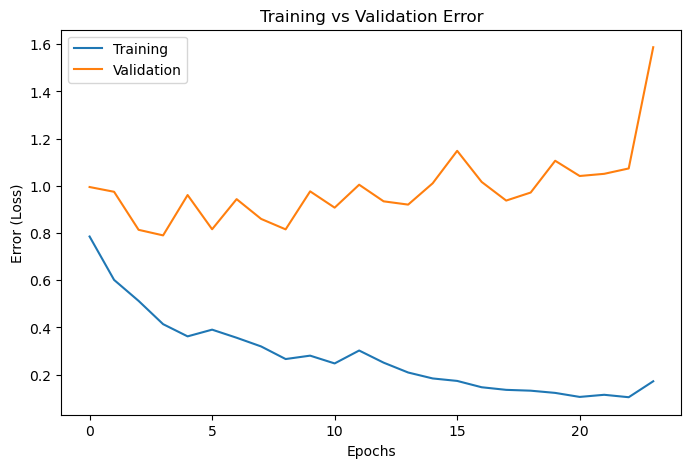

In [173]:
plt.figure(figsize=(8,5))
plt.plot(training_history.history['loss'], label='Training')
plt.plot(training_history.history['val_loss'], label='Validation')
plt.title('Training vs Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Error (Loss)')
plt.legend()
plt.show()

In [174]:
def predict_classes(model, X, choix):
    probs = model.predict(X)

    if choix == "stade_tumoral":
        # binaire
        preds = (probs.flatten() >= 0.5).astype(int)
    else:
        # multi-classes
        preds = np.argmax(probs, axis=1)

    return probs, preds

In [175]:
def evaluate_model(y_true, y_pred, class_names=None, title="Confusion matrix"):

    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="macro"
    )

    # noms des classes
    if class_names is None:
        class_names = [str(i) for i in range(cm.shape[0])]

    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

    # plot
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.tight_layout()
    plt.show()

    print("Evaluation summary:")
    print(f" Accuracy:  {acc:.3f}")
    print(f" Precision (macro): {precision:.3f}")
    print(f" Recall (macro):    {recall:.3f}")
    print(f" F1-score (macro):  {f1:.3f}")
    print("\nDetailed classification report:\n")
    print(classification_report(y_true, y_pred, target_names=class_names))

    return cm_df

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


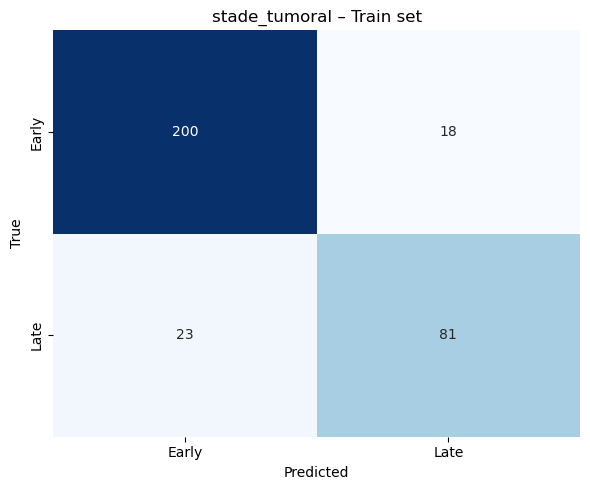

Evaluation summary:
 Accuracy:  0.873
 Precision (macro): 0.858
 Recall (macro):    0.848
 F1-score (macro):  0.853

Detailed classification report:

              precision    recall  f1-score   support

       Early       0.90      0.92      0.91       218
        Late       0.82      0.78      0.80       104

    accuracy                           0.87       322
   macro avg       0.86      0.85      0.85       322
weighted avg       0.87      0.87      0.87       322



,Early,Late
Early,200,18
Late,23,81


In [176]:
_, y_train_pred = predict_classes(model, X_train_final, choix)

evaluate_model(
    y_train,
    y_train_pred,
    class_names=class_names,
    title=f"{choix} – Train set"
)

In [177]:
def collapse_check(y_true, y_pred):
    unique_preds = np.unique(y_pred)
    if len(unique_preds) == 1:
        print("⚠️ WARNING: Model predicts only one class:", unique_preds[0])
        
collapse_check(y_train, y_train_pred)

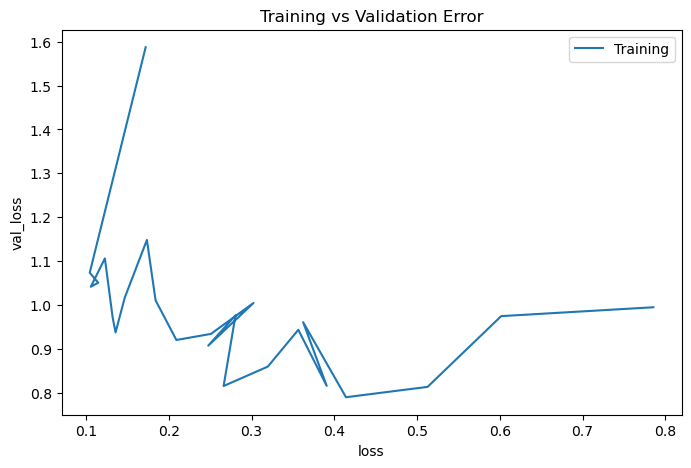

In [178]:
plt.figure(figsize=(8,5))
plt.plot(training_history.history['loss'],training_history.history['val_loss'], label='Training')
# plt.plot(training_history.history['val_loss'], label='Validation')
plt.title('Training vs Validation Error')
plt.xlabel('loss')
plt.ylabel('val_loss')
plt.legend()
plt.show()

## *Test Evaluation*

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


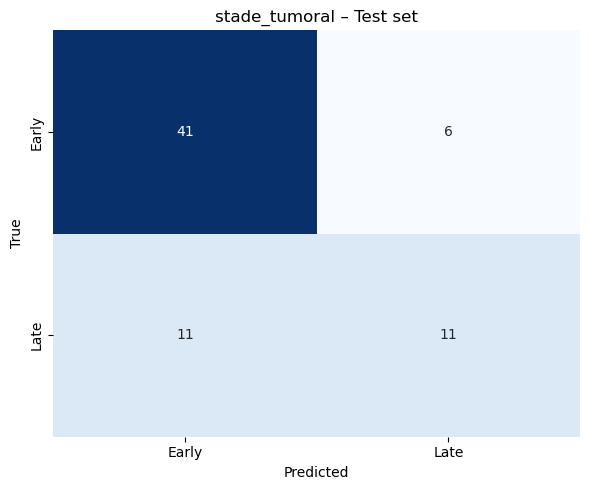

Evaluation summary:
 Accuracy:  0.754
 Precision (macro): 0.718
 Recall (macro):    0.686
 F1-score (macro):  0.696

Detailed classification report:

              precision    recall  f1-score   support

       Early       0.79      0.87      0.83        47
        Late       0.65      0.50      0.56        22

    accuracy                           0.75        69
   macro avg       0.72      0.69      0.70        69
weighted avg       0.74      0.75      0.74        69



,Early,Late
Early,41,6
Late,11,11


In [179]:
_, y_test_pred  = predict_classes(model, X_test_final, choix)

evaluate_model(
    y_test,
    y_test_pred,
    class_names=class_names,
    title=f"{choix} – Test set"
)

In [180]:
def collapse_check(y_true, y_pred):
    unique_preds = np.unique(y_pred)
    if len(unique_preds) == 1:
        print("⚠️ WARNING: Model predicts only one class:", unique_preds[0])
        
collapse_check(y_test, y_test_pred)

### enregistrer les résultats en pdf

In [181]:
import os
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import classification_report

def evaluate_and_save_pdf(
    y_true,
    y_pred,
    class_names,
    choix,
    output_dir="../results"
):
    # --- sécurité dossier ---
    os.makedirs(output_dir, exist_ok=True)

    # --- métriques ---
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="macro"
    )

    report = classification_report(
        y_true, y_pred, target_names=class_names
    )

    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

    pdf_path = f"{output_dir}/evaluation_{choix}.pdf"

    with PdfPages(pdf_path) as pdf:

        # ===== PAGE 1 : Confusion matrix =====
        fig1, ax1 = plt.subplots(figsize=(7, 6))
        sns.heatmap(
            cm_df,
            annot=True,
            fmt="d",
            cmap="Blues",
            cbar=False,
            ax=ax1
        )
        ax1.set_title(f"Confusion Matrix – {choix}")
        ax1.set_xlabel("Predicted")
        ax1.set_ylabel("True")
        fig1.tight_layout()
        pdf.savefig(fig1)
        plt.close(fig1)

        # ===== PAGE 2 : Metrics =====
        fig2, ax2 = plt.subplots(figsize=(8, 10))
        ax2.axis("off")

        summary_text = (
            f"Task: {choix}\n\n"
            f"Accuracy: {acc:.3f}\n"
            f"Precision (macro): {precision:.3f}\n"
            f"Recall (macro): {recall:.3f}\n"
            f"F1-score (macro): {f1:.3f}\n\n"
            "Classification report:\n"
        )

        ax2.text(
            0.01, 0.98,
            summary_text,
            va="top",
            ha="left",
            fontsize=11
        )

        ax2.text(
            0.01, 0.60,
            report,
            va="top",
            ha="left",
            fontsize=9,
            family="monospace"
        )

        ax2.set_title(f"Evaluation metrics – {choix}", fontsize=14)
        fig2.tight_layout()
        pdf.savefig(fig2)
        plt.close(fig2)

    print(f"PDF sauvegardé : {pdf_path}")

evaluate_and_save_pdf(
    y_true=y_test,
    y_pred=y_test_pred,
    class_names=class_names,
    choix=choix
)

PDF sauvegardé : ../results/evaluation_stade_tumoral.pdf
